1. Import some libraries

In [21]:
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns

2. Read csv data into the iris variable. 
The columns are given human readable names so that they can be used to annotate figures. The column containing the name of the iris varieties is called 'class' to underscore that the data represents a classification problem.

In [22]:
# Read CSV file to data frame and name the variables
iris = pd.read_csv("iris_data/bezdekIris.data", names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "class"])

3. Examine the dataset.
The dataset consists of 150 observations of 4 variables; sepal length, sepal width, petal length, petal width. These are represented as      columns along with fifth column, called 'class', representing the iris variety.   

In [23]:
# Examine the first 5 rows in the dataset
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The class column contains 3 unique values; Iris-setosa, Iris-versiolor, and Iris-virginica.

In [24]:
# Get an array of unique values in the class column
iris["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

When we group the dataset by class we see that there are 50 observations of each of the 4 variables for each class.

In [25]:
iris.groupby("class").count()

,Sepal Length,Sepal Width,Petal Length,Petal Width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


The dataset is currently in wide format, i.e. observations are in rows and variables are in columns, each row holding observations for a number of variables (ref: https://seaborn.pydata.org/tutorial/data_structure.html). This is a useful format for some applications and it is certainly a good compact and intuitive format for visual examination, . However, long format, in which each row contains just a single observation, is more flexible for plotting as columns can simply be assigned to, for instance, x-axis, y-axis, colour, etc. Using wide format data for plotting is perfectly feasible but it can necessitate awkward or difficult data manipulations in certain situations.

The pandas DataFrame.melt() method transforms a wide-form dataframe to a long form one by placing all of the values in one column and adding columns for the grouping variables (ref: https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.melt.html).

In [26]:
iris_long = iris.melt(value_vars=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], id_vars="class")
iris_long.head()

,class,variable,value
0,Iris-setosa,Sepal Length,5.1
1,Iris-setosa,Sepal Length,4.9
2,Iris-setosa,Sepal Length,4.7
3,Iris-setosa,Sepal Length,4.6
4,Iris-setosa,Sepal Length,5.0


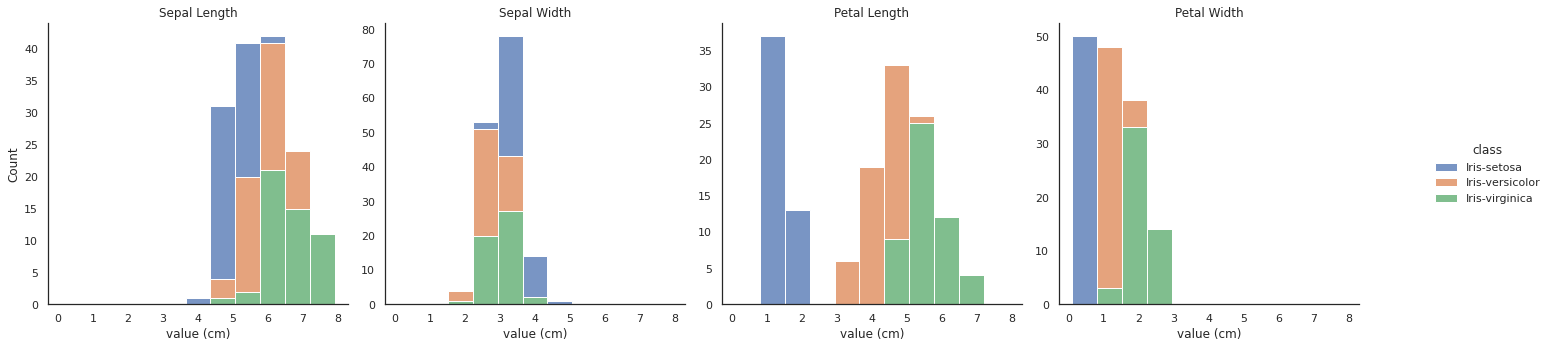

In [75]:
sns.set_theme(style="white")
h = sns.displot(data=iris_long, 
                x="value", 
                col="variable", 
                multiple="stack", 
                kind="hist", 
                hue="class",
                #bins=20,
                facet_kws=dict(
                    sharex=False, 
                    sharey=False,
                    margin_titles=True
                )
               )
h.set_axis_labels("value (cm)")
h.set_titles(col_template="{col_name}", row_template="{row_name}")
#sns.despine(left=True)

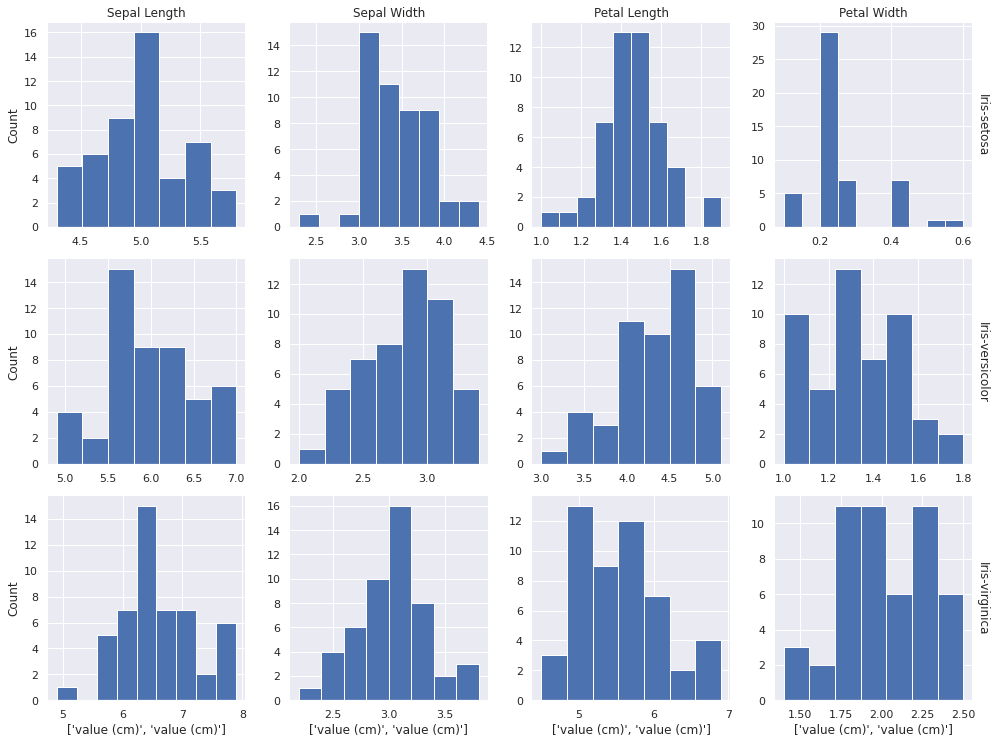

In [74]:
sns.set()
g = sns.displot(data=iris_long, 
            x="value", 
            row="class", 
            col="variable", 
            kind="hist", 
            kde=False, 
            common_bins=False,
            height=3.5, aspect=1, alpha=1, linewidth=1,
            facet_kws=dict(
                sharex=False, 
                sharey=False,
                margin_titles=True
            )
           )
g.set_axis_labels(["value (cm)", "value (cm)"])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.despine(left=True)

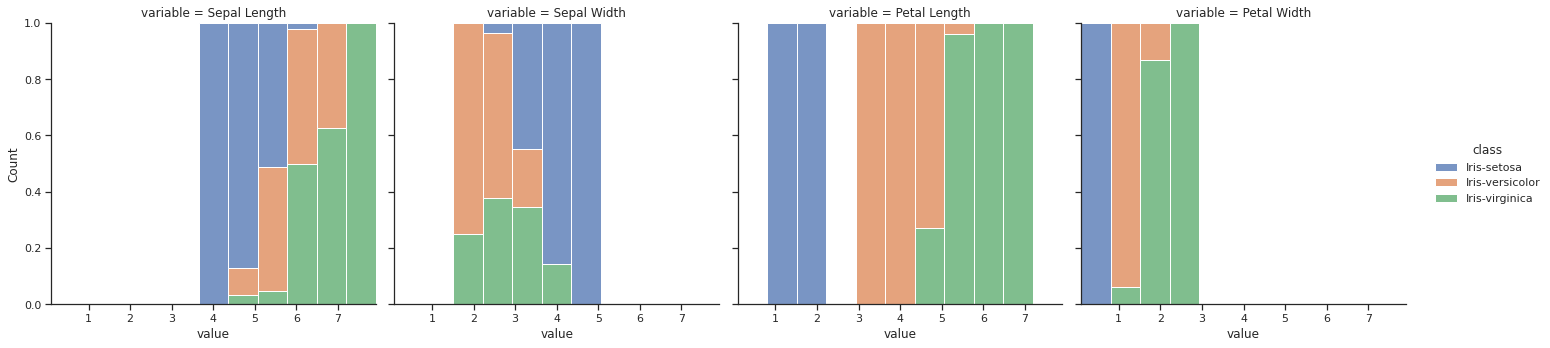

In [29]:
sns.displot(data=iris_long, x="value", hue="class", col="variable", kind="hist", multiple="fill")

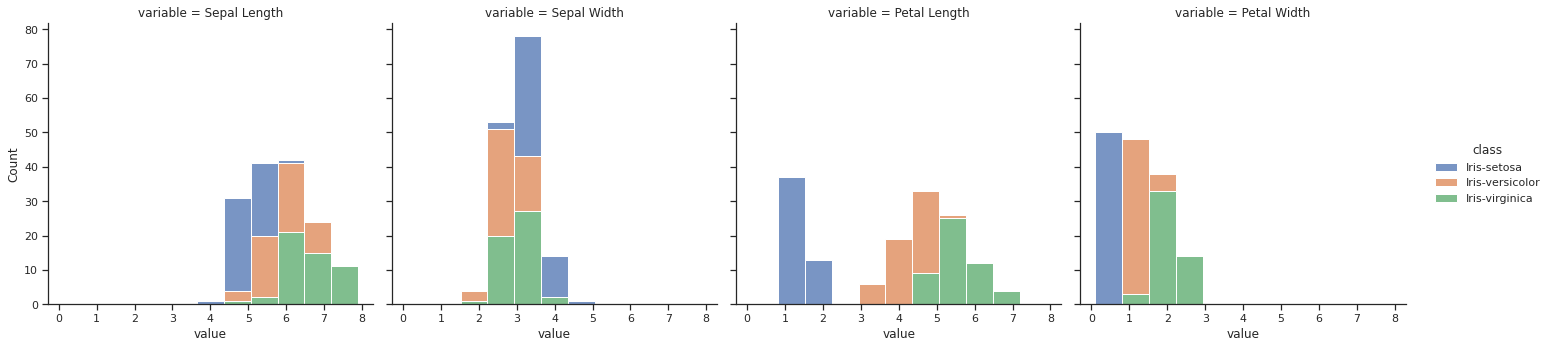

In [30]:
sns.displot(data=iris_long, x="value", hue="class", col="variable", kind="hist", multiple="stack")

This tells us that sepal dimensions are unlikely to be 

In [ ]:
sns.set_theme(style="white")
sns.displot(data=iris_long, 
            x="value", 
            #row="class",
            multiple="stack",
            hue="class",
            col="variable", 
            kind="hist", 
            kde=False, 
            common_bins=True, 
            facet_kws=dict(sharex=False, 
                           sharey=False,
                           margin_titles=True)
           )

In [32]:
iris_long.head()

,class,variable,value
0,Iris-setosa,Sepal Length,5.1
1,Iris-setosa,Sepal Length,4.9
2,Iris-setosa,Sepal Length,4.7
3,Iris-setosa,Sepal Length,4.6
4,Iris-setosa,Sepal Length,5.0


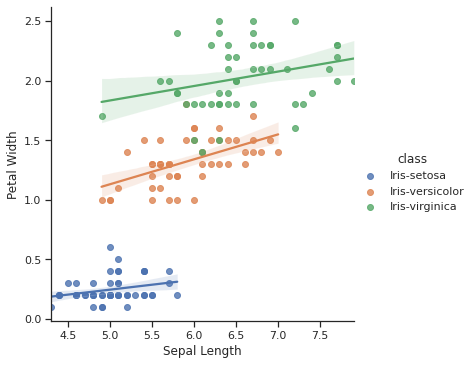

In [47]:
sns.lmplot(data=iris, x="Sepal Length", y="Petal Width", hue="class")